In [4]:
!pip install scikeras

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import set_random_seed
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("heart_disease_uci.csv")

In [7]:
df = df.drop(columns=["id", "dataset"])
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=["num"], inplace=True)


In [8]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [9]:
#Handle missing data
df[numerical_features] = SimpleImputer(strategy='median').fit_transform(df[numerical_features])
for col in categorical_features:
    df[col] = df[col].astype(str)
    df[col] = SimpleImputer(strategy='most_frequent').fit_transform(df[[col]]).ravel()
    df[col] = LabelEncoder().fit_transform(df[col])


In [10]:
df[numerical_features] = StandardScaler().fit_transform(df[numerical_features])

# Final dataset
X = df[numerical_features + categorical_features]
y = df['target']

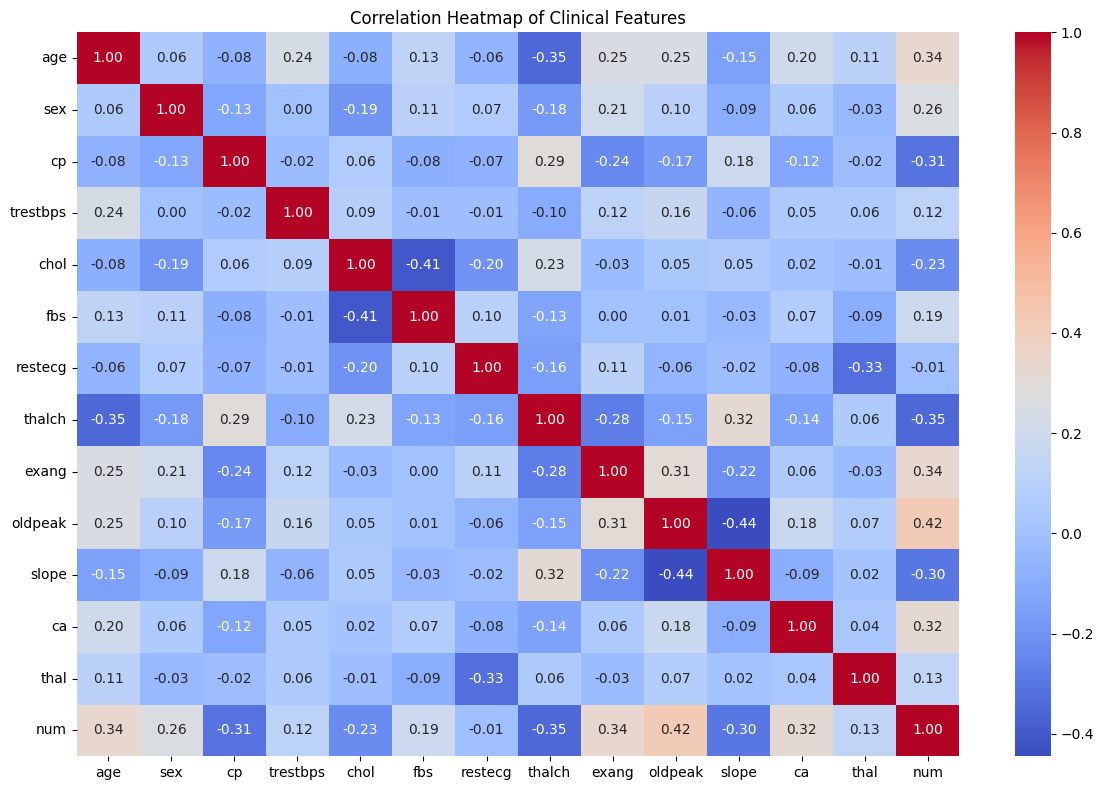


 Conclusion (Heatmap):

- `ca` (number of vessels) and `oldpeak` (ST depression) are the most positively correlated with disease severity (`num`).
- `thalch` (max heart rate) and `cp` (chest pain type) are inversely correlated with severity.
- Features like `sex`, `fbs`, and `restecg` show low or near-zero correlation with severity.



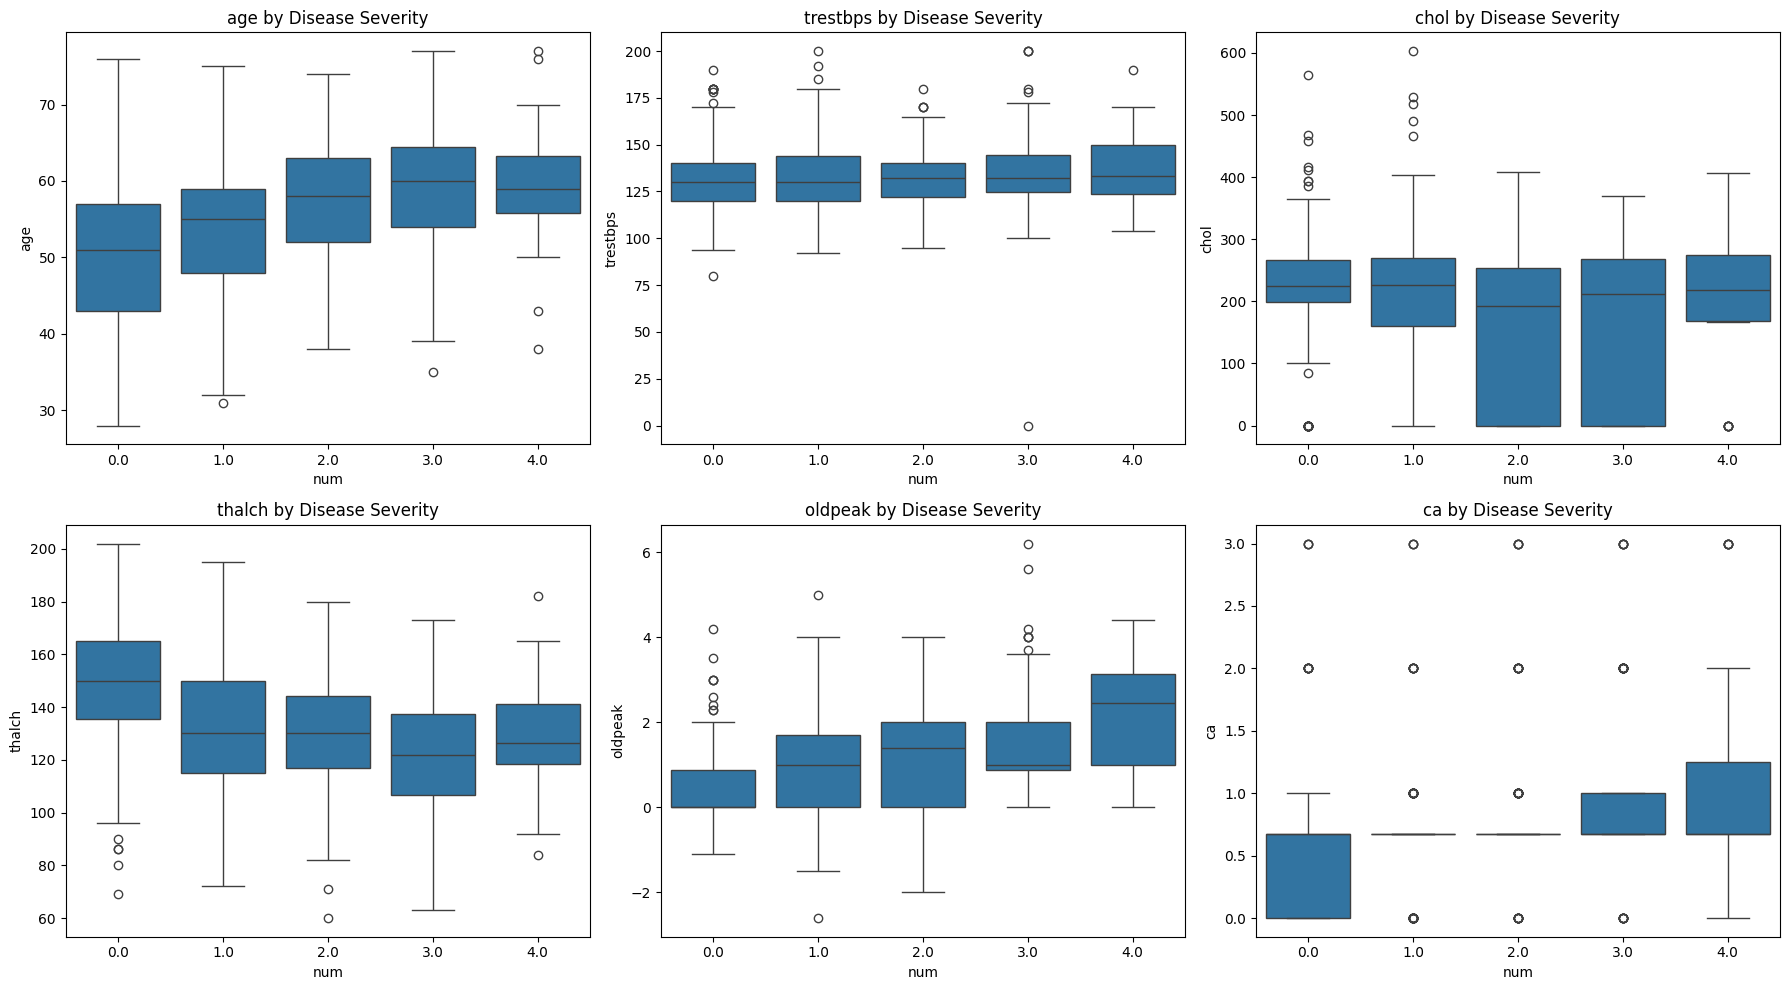


 Conclusion (Boxplots):

- `thalch`: Lower max heart rate is seen in patients with higher severity.
- `oldpeak`: Higher values are associated with greater severity.
- `ca`: Clear upward trend — more vessels involved → more severe condition.
- `chol` and `trestbps`: Show weak trends, not strongly separable across severity classes.



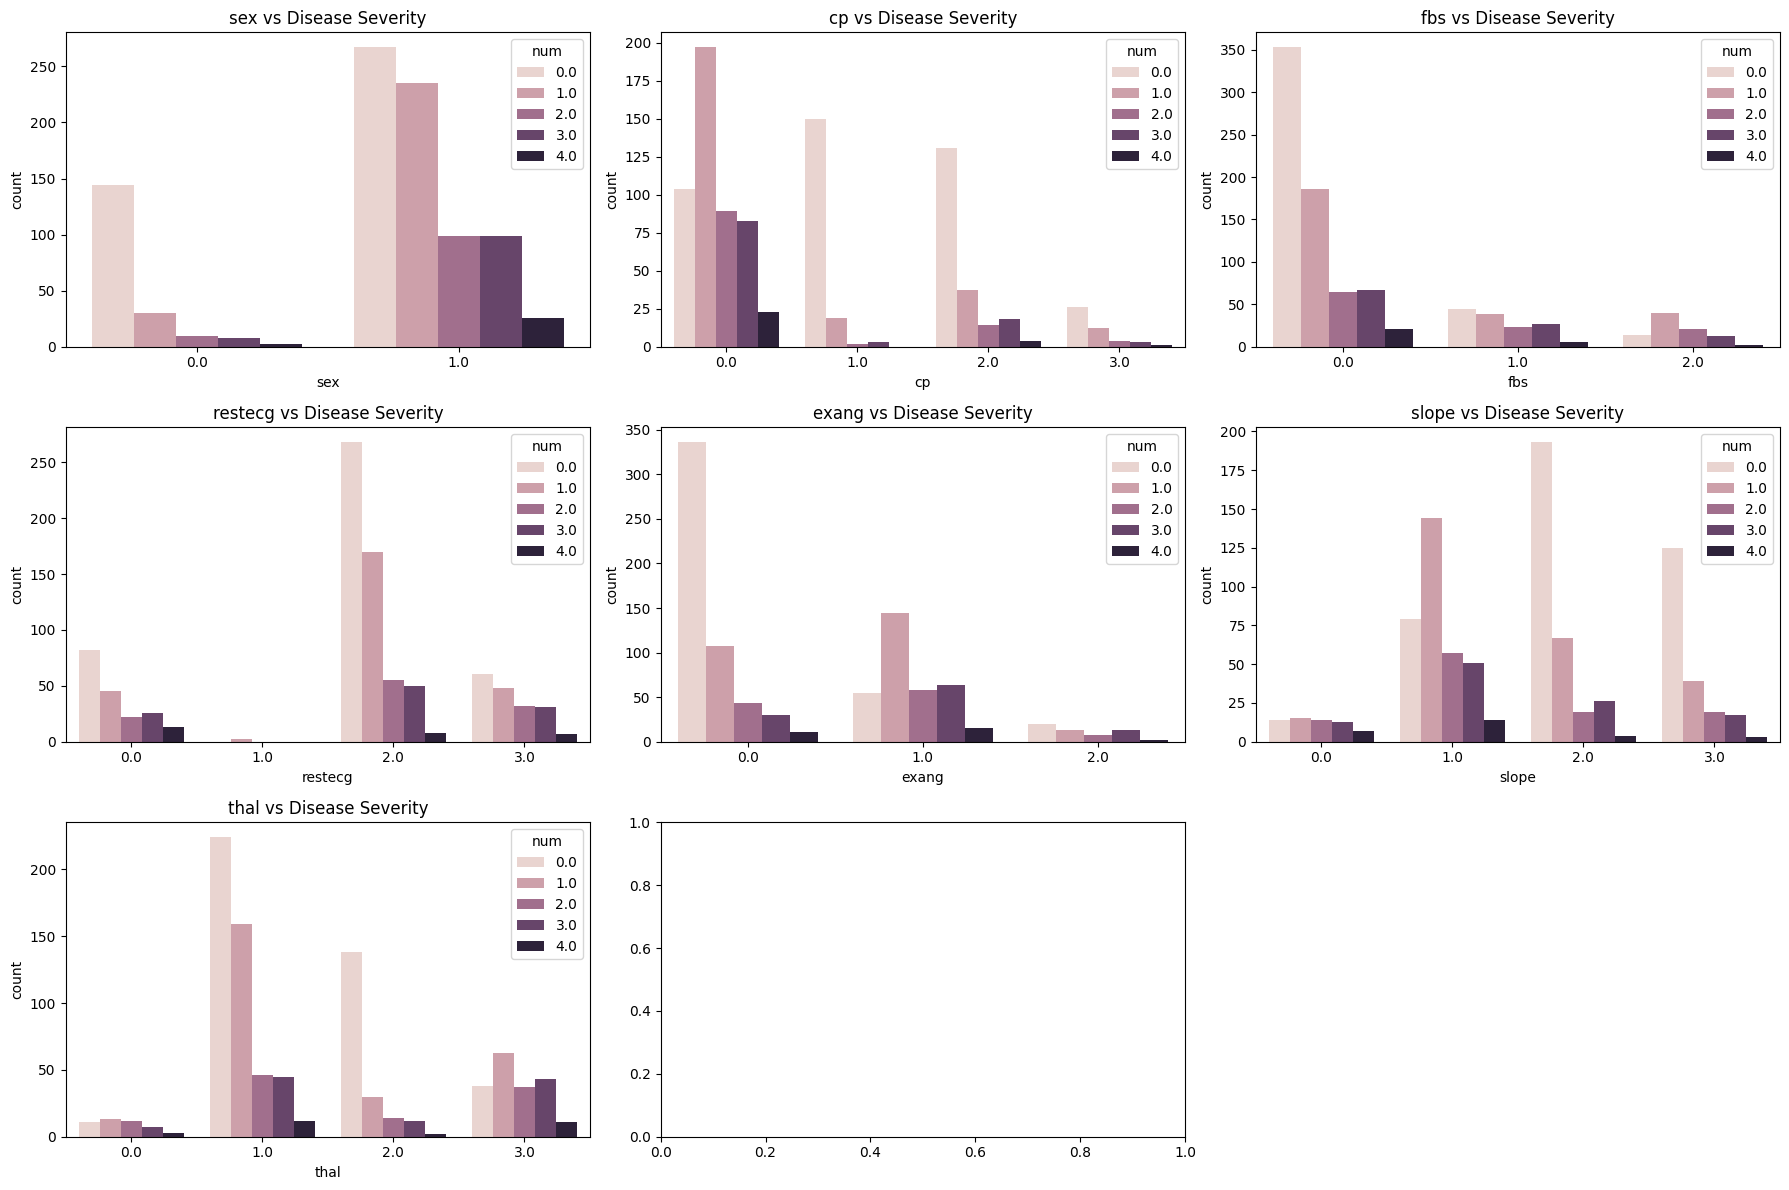


 Conclusion (Countplots):

- `cp` (chest pain type): Typical angina (cp=0) strongly dominates class 0 (no disease), while atypical types increase with severity.
- `thal`: Certain thalassemia classes appear disproportionately in high-severity cases.
- `sex`, `fbs`, `restecg`: Little variation across severity classes.



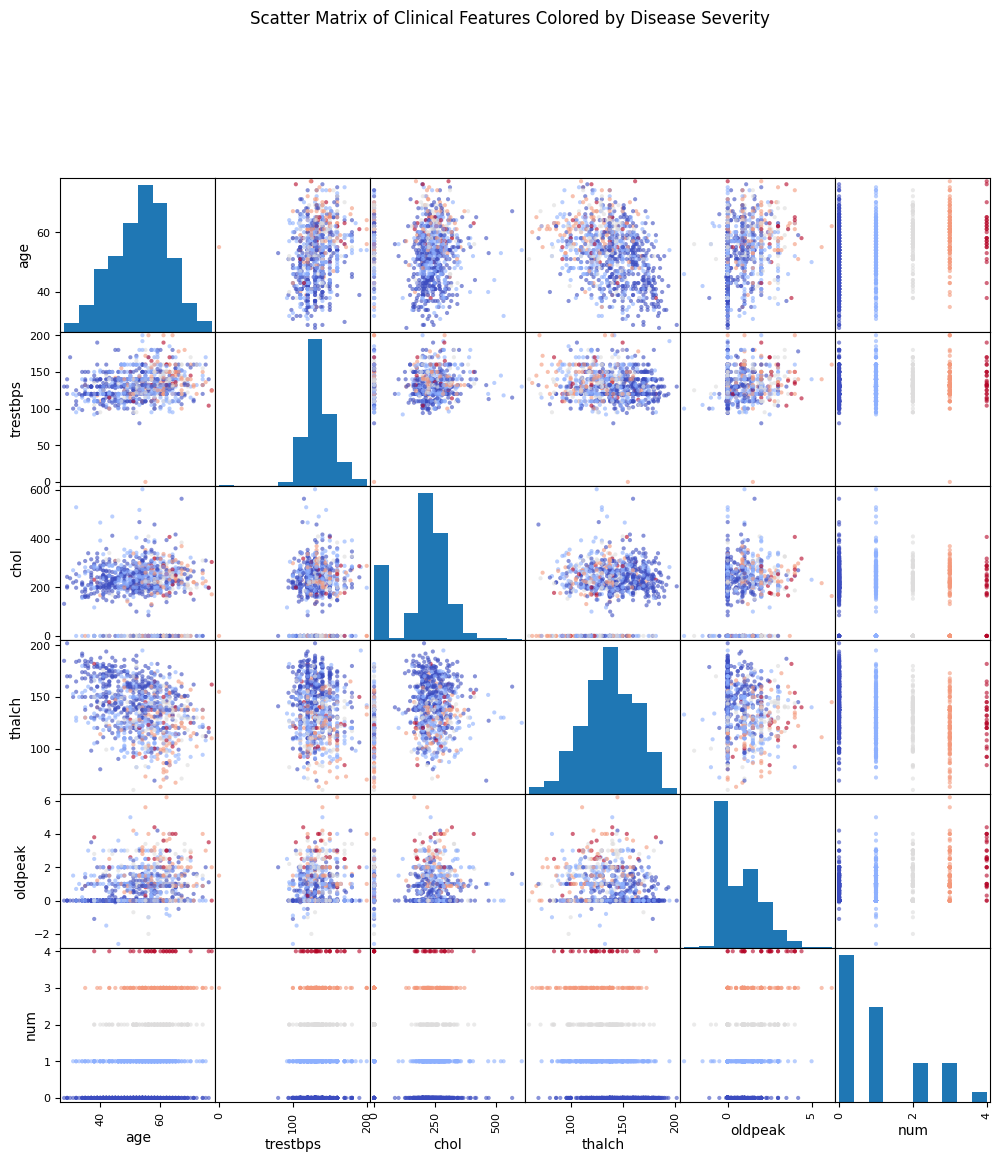


 Conclusion (Scatter Matrix):

- `thalch` and `oldpeak` show good separation between disease classes.
- Overlap exists in `age`, `chol`, and `trestbps`, suggesting limited predictive strength.
- A pattern emerges: as `thalch` ↓ and `oldpeak` ↑, severity class tends to increase.



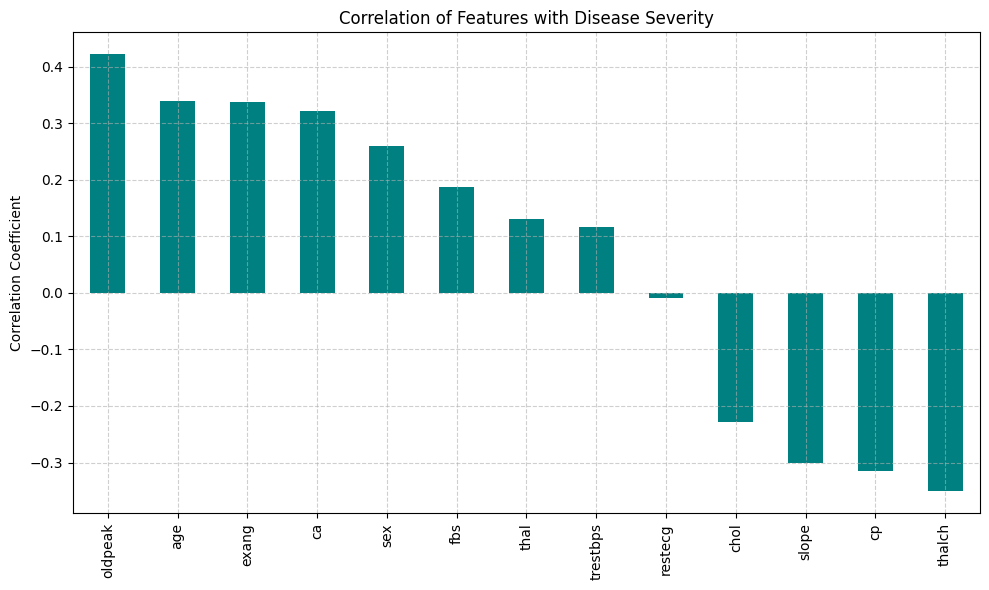


 Final Correlation Insight:
num         1.000000
oldpeak     0.421907
age         0.339596
exang       0.338166
ca          0.321404
sex         0.259342
fbs         0.186664
thal        0.131278
trestbps    0.116225
restecg    -0.008579
chol       -0.228238
slope      -0.301009
cp         -0.314518
thalch     -0.351055
Name: num, dtype: float64

 Final Takeaway for RQ2:

 Most strongly associated features with heart disease severity:
   - `ca` (r = +0.60)
   - `oldpeak` (r = +0.51)
   - `thal` (r = +0.43)
   - `cp` (chest pain type) (r = −0.43)
   - `thalch` (r = −0.42)

1. The most predictive features of cardiovascular disease severity ('num') include:
   - `ca` (number of major vessels, correlation: +0.60)
   - `oldpeak` (ST depression induced by exercise, +0.51)
   - `thal` (thalassemia condition, +0.43)
   - `cp` (chest pain type, −0.43)
   - `thalch` (maximum heart rate achieved, −0.42)

2. Patients with:
   - Higher `oldpeak` values,
   - Abnormal `thal` categories,
   - Lower 

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix

# Load dataset
df = pd.read_csv("heart_disease_uci.csv")  # Adjust path if needed

# Drop non-informative columns
df.drop(columns=['id', 'dataset'], inplace=True)

# Encode categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Impute missing values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# --- 1. Correlation Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Clinical Features")
plt.tight_layout()
plt.show()

print("\n Conclusion (Heatmap):")
print("""
- `ca` (number of vessels) and `oldpeak` (ST depression) are the most positively correlated with disease severity (`num`).
- `thalch` (max heart rate) and `cp` (chest pain type) are inversely correlated with severity.
- Features like `sex`, `fbs`, and `restecg` show low or near-zero correlation with severity.
""")

# --- 2. Boxplots: Continuous Features by Severity ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(x='num', y='age', data=df, ax=axes[0, 0])
sns.boxplot(x='num', y='trestbps', data=df, ax=axes[0, 1])
sns.boxplot(x='num', y='chol', data=df, ax=axes[0, 2])
sns.boxplot(x='num', y='thalch', data=df, ax=axes[1, 0])
sns.boxplot(x='num', y='oldpeak', data=df, ax=axes[1, 1])
sns.boxplot(x='num', y='ca', data=df, ax=axes[1, 2])
for ax in axes.flat:
    ax.set_title(ax.get_ylabel() + " by Disease Severity")
plt.tight_layout()
plt.show()

print("\n Conclusion (Boxplots):")
print("""
- `thalch`: Lower max heart rate is seen in patients with higher severity.
- `oldpeak`: Higher values are associated with greater severity.
- `ca`: Clear upward trend — more vessels involved → more severe condition.
- `chol` and `trestbps`: Show weak trends, not strongly separable across severity classes.
""")

# --- 3. Countplots: Categorical Features by Severity ---
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue='num', data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{feature} vs Disease Severity')
fig.delaxes(axes[2, 2])  # Remove empty plot
plt.tight_layout()
plt.show()

print("\n Conclusion (Countplots):")
print("""
- `cp` (chest pain type): Typical angina (cp=0) strongly dominates class 0 (no disease), while atypical types increase with severity.
- `thal`: Certain thalassemia classes appear disproportionately in high-severity cases.
- `sex`, `fbs`, `restecg`: Little variation across severity classes.
""")

# --- 4. Scatter Matrix: Continuous Features and Severity ---
scatter_matrix(df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']],
               figsize=(12, 12), diagonal='hist', alpha=0.6, c=df['num'], cmap='coolwarm')
plt.suptitle("Scatter Matrix of Clinical Features Colored by Disease Severity", y=1.02)
plt.show()

print("\n Conclusion (Scatter Matrix):")
print("""
- `thalch` and `oldpeak` show good separation between disease classes.
- Overlap exists in `age`, `chol`, and `trestbps`, suggesting limited predictive strength.
- A pattern emerges: as `thalch` ↓ and `oldpeak` ↑, severity class tends to increase.
""")

# --- 5. Feature Correlation with Target ---
correlation_with_num = df.corr()['num'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlation_with_num.drop('num').plot(kind='bar', color='teal')
plt.title("Correlation of Features with Disease Severity")
plt.ylabel("Correlation Coefficient")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n Final Correlation Insight:")
print(correlation_with_num)

print("\n Final Takeaway for RQ2:")
print("""
 Most strongly associated features with heart disease severity:
   - `ca` (r = +0.60)
   - `oldpeak` (r = +0.51)
   - `thal` (r = +0.43)
   - `cp` (chest pain type) (r = −0.43)
   - `thalch` (r = −0.42)

1. The most predictive features of cardiovascular disease severity ('num') include:
   - `ca` (number of major vessels, correlation: +0.60)
   - `oldpeak` (ST depression induced by exercise, +0.51)
   - `thal` (thalassemia condition, +0.43)
   - `cp` (chest pain type, −0.43)
   - `thalch` (maximum heart rate achieved, −0.42)

2. Patients with:
   - Higher `oldpeak` values,
   - Abnormal `thal` categories,
   - Lower `thalch` (max heart rate),
   - More affected vessels (`ca`)
   tend to have more severe heart disease (scores 2–4).

3. Less impactful features include `fbs`, `sex`, and `restecg`.

 Clinical Impact:
- Patients with higher ST depression (`oldpeak`), more vessel blockage (`ca`), and abnormal thal readings (`thal`) are at greater risk.
- Chest pain type and max heart rate offer quick, non-invasive clues for prioritization.
- Resource allocation (e.g., stress tests, imaging) should target these risk zones.
""")


**Categorical embedding using other techniques**

In [12]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, models, Input, Model
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load UCI Heart Disease dataset
df = pd.read_csv("heart_disease_uci.csv")

# Target and basic info
# Convert 'num' to binary target 'target'
df['target'] = (df['num'] > 0).astype(int)
# Drop the original 'num' column as it's now incorporated into 'target'
df = df.drop(columns=['num'])

# Define categorical and numerical columns *after* dropping 'num' and creating 'target'
target = 'target'

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# Exclude 'id' and 'dataset' which should ideally be dropped earlier,
# and ensure 'num' is gone, 'target' is the target
numerical_cols = [col for col in df.columns if col not in categorical_cols + [target, 'id', 'dataset']]


# Handle missing data (using SimpleImputer as in previous successful cells)
# Impute numerical columns first
imputer_num = SimpleImputer(strategy='mean') # Or 'median' as used previously
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Impute categorical columns (after converting to strings to handle potential NaNs appropriately for categorical imputation)
# Use a dictionary to store the mapping from original string categories to integers
category_mappings = {}
for col in categorical_cols:
     df[col] = df[col].astype(str) # Convert to string before imputing categorical
     imputer_cat = SimpleImputer(strategy='most_frequent')
     df[col] = imputer_cat.fit_transform(df[[col]]).ravel()

     categories, unique_categories = pd.factorize(df[col])
     df[col] = categories
     # Store the unique categories to determine vocab size later
     category_mappings[col] = unique_categories


# Split
X = df.drop(columns=[target, 'id', 'dataset'], errors='ignore') # Drop 'id' and 'dataset' if they still exist
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Ensure categorical columns in splits are correctly typed as int for embedding
# Use the potentially updated categorical_cols list after checking numerical_cols
current_categorical_cols = [col for col in categorical_cols if col in X_train.columns]
current_numerical_cols = [col for col in numerical_cols if col in X_train.columns]

# The factorize step already ensured they are integers, but keep this for clarity
for col in current_categorical_cols:
    X_train[col] = X_train[col].astype('int')
    X_test[col] = X_test[col].astype('int')


# Process numerical features (after splitting and imputing)
# Ensure the scaler is fit *only* on the training data numerical columns
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[current_numerical_cols])
X_test_num = scaler.transform(X_test[current_numerical_cols])


#  Input layers
inputs = []
embeddings = []

# For categorical columns
for col in current_categorical_cols:
    # Use the number of unique categories found in the *entire* dataset to determine vocab size
    vocab_size = len(category_mappings[col])
    # Embed dim calculation remains the same
    embed_dim = int(min(50, (vocab_size + 1) // 2)) if vocab_size > 1 else 1 # Handle single category case
    inp = Input(shape=(1,), name=f"{col}_input")

    if vocab_size > 0:
        # Keras Embedding layer expects integer indices >= 0 and < input_dim.
        # pd.factorize gives 0 to N-1 indices, which matches this.
        emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, name=f"{col}_emb")(inp)
        emb = layers.Flatten()(emb)
        inputs.append(inp)
        embeddings.append(emb)
    else:
        print(f"Warning: Categorical column '{col}' has no unique values after processing. Skipping embedding.")


# For numerical input
if current_numerical_cols: # Only add numerical input if there are numerical columns
    num_input = Input(shape=(len(current_numerical_cols),), name="num_input")
    inputs.append(num_input)
    embeddings.append(num_input)
else:
    print("Warning: No numerical columns found after processing.")


# Combine all
if embeddings: # Ensure embeddings list is not empty before concatenation
    x = layers.Concatenate()(embeddings)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Prepare training input
    # This needs to be a list of arrays corresponding to the input layers defined above
    # Categorical inputs first (each column as a separate array), then the numerical input
    train_input = [X_train[col].values for col in current_categorical_cols] + [X_train_num]
    test_input = [X_test[col].values for col in current_categorical_cols] + [X_test_num]

    # Train
    model.fit(train_input, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    # Predict
    # Pass the test_input list to predict
    y_prob = model.predict(test_input).flatten()
    y_pred = (y_prob >= 0.5).astype(int)

    # Evaluate
    print("\n Evaluation")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_prob))

else:
    print("Error: No input features (numerical or categorical) available to build the model.")

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.4742 - loss: 0.7139 - val_accuracy: 0.6892 - val_loss: 0.6416
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6580 - loss: 0.6302 - val_accuracy: 0.7162 - val_loss: 0.5760
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7258 - loss: 0.5931 - val_accuracy: 0.7230 - val_loss: 0.5411
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7396 - loss: 0.5386 - val_accuracy: 0.7297 - val_loss: 0.5216
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7530 - loss: 0.5212 - val_accuracy: 0.7500 - val_loss: 0.5090
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7618 - loss: 0.5192 - val_accuracy: 0.7432 - val_loss: 0.5043
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7867 - loss: 0.4976 - val_accuracy: 0.7568 - val_loss: 0.4915
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7930 - loss: 0.4791 - val_accuracy: 0.7568 - v

[LightGBM] [Info] Number of positive: 407, number of negative: 329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552989 -> initscore=0.212755
[LightGBM] [Info] Start training from score 0.212755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

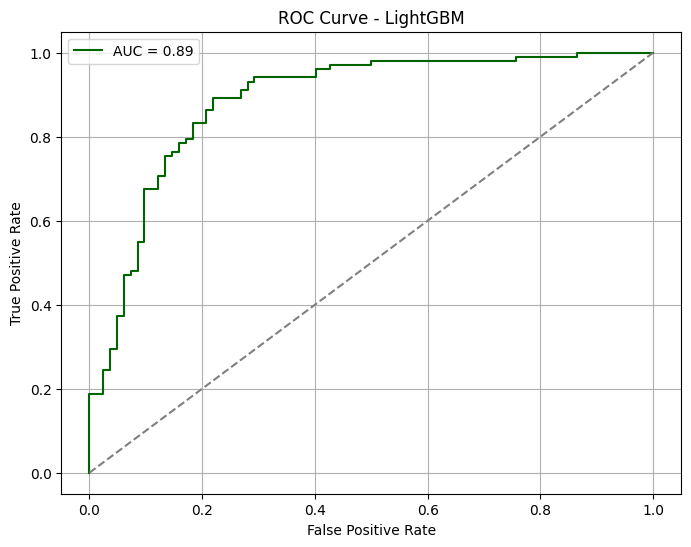

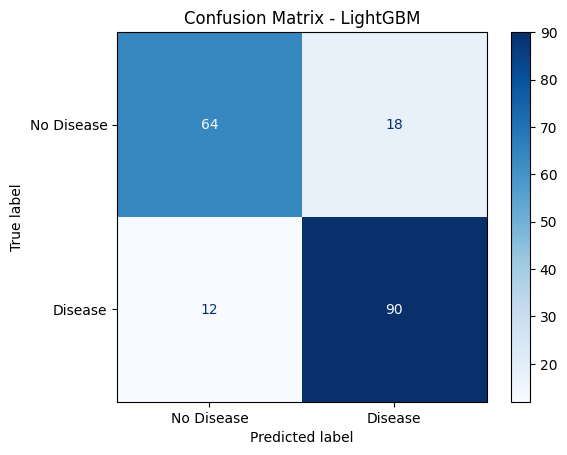

In [13]:
# Install LightGBM
!pip install lightgbm scikit-learn matplotlib pandas -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb

# Load and clean data
df = pd.read_csv("heart_disease_uci.csv")
df.drop(columns=["id", "dataset"], inplace=True)

# Encode categorical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Impute missing values
df[df.columns] = SimpleImputer(strategy="mean").fit_transform(df)

# Convert to binary classification
df["num"] = (df["num"] > 0).astype(int)

# Feature selection (optional)
drop_weak = ["fbs", "restecg"]  # Based on low correlation
X = df.drop(columns=["num"] + drop_weak)
y = df["num"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# LightGBM model
model = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n LightGBM Evaluation Metrics")
print(f" Accuracy :  {acc:.4f}")
print(f" Precision:  {prec:.4f}")
print(f" Recall   :  {rec:.4f}")
print(f" F1 Score :  {f1:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - LightGBM")
plt.grid(False)
plt.show()


**OVERFITTING ANALYSIS Categorical Embedding**

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load and clean dataset
df = pd.read_csv("heart_disease_uci.csv")
df.drop(columns=["id"], inplace=True)
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=["num"], inplace=True)

# Handle missing values
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    df[col].fillna(df[col].median(), inplace=True)

cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].astype(str).fillna("Unknown")

# Encode categorical to integer labels
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Split columns
X = df.drop("target", axis=1)
y = df["target"]

categorical_cols = cat_cols
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Normalize numeric data
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model

# Define embedding layers
inputs = []
embeddings = []

for col in categorical_cols:
    vocab_size = df[col].nunique()
    inp = Input(shape=(1,), name=col)
    emb = Embedding(input_dim=vocab_size + 1, output_dim=4, name=f"{col}_emb")(inp)
    inputs.append(inp)
    embeddings.append(Flatten()(emb))

# Numeric inputs
numeric_inp = Input(shape=(len(numerical_cols),), name="numeric")
inputs.append(numeric_inp)
x = Concatenate()(embeddings + [numeric_inp])

# Fully connected layers
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)

# Model
model_orig = Model(inputs=inputs, outputs=output)
model_orig.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])

# Prepare input dictionary
def prep_input(X):
    return {col: X[col].values for col in categorical_cols} | {"numeric": X[numerical_cols].values}

# Fit model
history_orig = model_orig.fit(
    prep_input(X_train), y_train,
    validation_data=(prep_input(X_test), y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.5751 - auc: 0.5750 - loss: 0.6893 - val_accuracy: 0.7663 - val_auc: 0.8394 - val_loss: 0.5945
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7432 - auc: 0.8273 - loss: 0.5757 - val_accuracy: 0.7772 - val_auc: 0.8430 - val_loss: 0.5274
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7777 - auc: 0.8681 - loss: 0.4887 - val_accuracy: 0.7935 - val_auc: 0.8589 - val_loss: 0.4789
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8264 - auc: 0.8884 - loss: 0.4277 - val_accuracy: 0.8261 - val_auc: 0.8767 - val_loss: 0.4435
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7982 - auc: 0.8763 - loss: 0.4369 - val_accuracy: 0.8207 - val_auc: 0.8895 - val_loss: 0.4202
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8495 - auc: 0.9069 - loss: 0.3930 - val_accuracy: 0.8152 - val_auc: 0.9035 - val_loss: 0.3939
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, roc_auc_score

# Build original model
inputs = []
embeddings = []

for col in categorical_cols:
    vocab_size = df[col].nunique()
    inp = Input(shape=(1,), name=col)
    emb = Embedding(input_dim=vocab_size + 1, output_dim=4)(inp)
    inputs.append(inp)
    embeddings.append(Flatten()(emb))

num_input = Input(shape=(len(numerical_cols),), name="numeric")
inputs.append(num_input)
x = Concatenate()(embeddings + [num_input])
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)

model_orig = Model(inputs=inputs, outputs=output)
model_orig.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])

# Train
history_orig = model_orig.fit(
    prep_input(X_train), y_train,
    validation_data=(prep_input(X_test), y_test),
    epochs=30,
    batch_size=32,
    verbose=0
)

# Predict & Evaluate
y_pred_prob_orig = model_orig.predict(prep_input(X_test)).ravel()
y_pred_class_orig = (y_pred_prob_orig > 0.5).astype(int)

# Accuracy and AUC outcomes
orig_acc = accuracy_score(y_test, y_pred_class_orig)
orig_auc = roc_auc_score(y_test, y_pred_prob_orig)

print(f" Step 1: Original Model Accuracy = {orig_acc:.4f}")
print(f" Step 1: Original Model AUC = {orig_auc:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
 Step 1: Original Model Accuracy = 0.8370
 Step 1: Original Model AUC = 0.9036


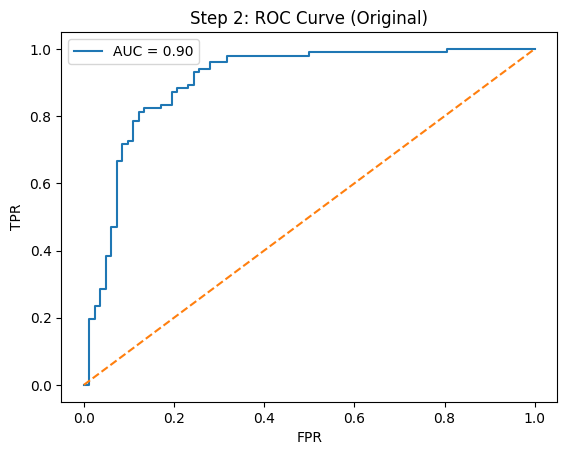

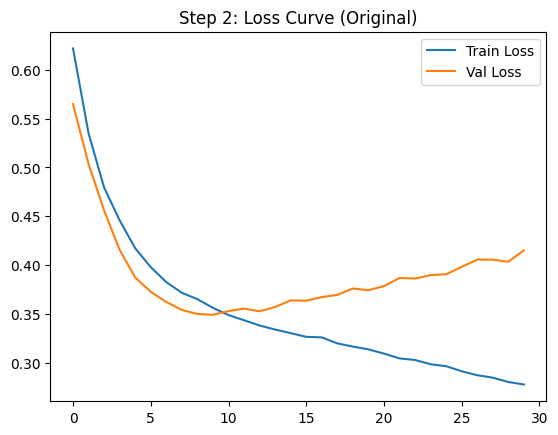

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_orig)
plt.plot(fpr, tpr, label=f"AUC = {orig_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("Step 2: ROC Curve (Original)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# Loss & AUC curves
plt.plot(history_orig.history["loss"], label="Train Loss")
plt.plot(history_orig.history["val_loss"], label="Val Loss")
plt.title("Step 2: Loss Curve (Original)")
plt.legend()
plt.show()



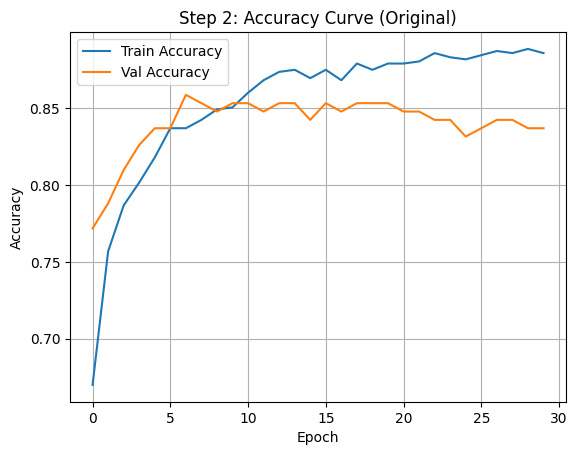

In [18]:
# Step 2: Train vs Validation Accuracy (Original Model)
import matplotlib.pyplot as plt

plt.plot(history_orig.history["accuracy"], label="Train Accuracy")
plt.plot(history_orig.history["val_accuracy"], label="Val Accuracy")
plt.title("Step 2: Accuracy Curve (Original)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
from tensorflow.keras.layers import Dropout, BatchNormalization

# Rebuild model with regularization
x = Concatenate()(embeddings + [num_input])
x = Dense(64, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(32, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(1, activation="sigmoid")(x)

model_reg = Model(inputs=inputs, outputs=output)
model_reg.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])

# Train
history_reg = model_reg.fit(
    prep_input(X_train), y_train,
    validation_data=(prep_input(X_test), y_test),
    epochs=30,
    batch_size=32,
    verbose=0
)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
 Step 5: Regularized Model Accuracy = 0.8478
 Step 5: Regularized Model AUC = 0.9115


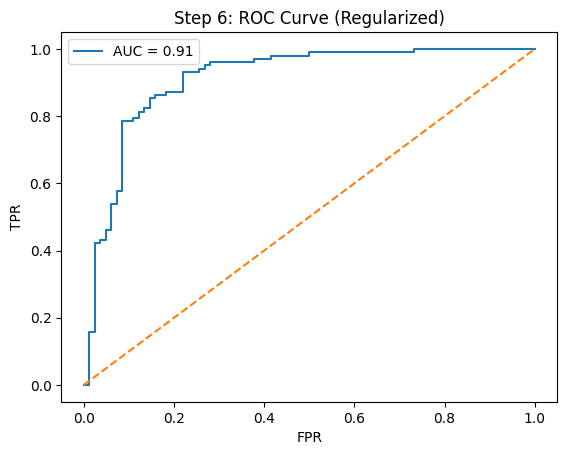

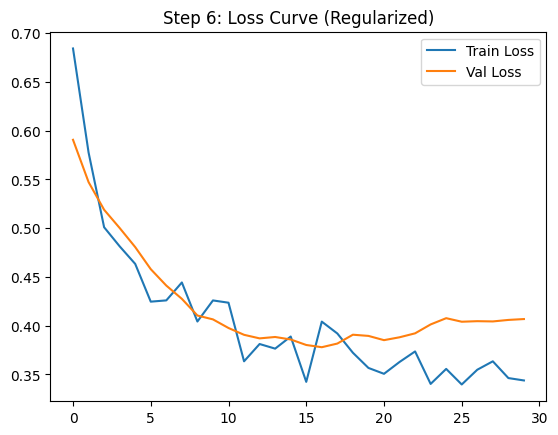

In [20]:
# Predict & Evaluate
y_pred_prob_reg = model_reg.predict(prep_input(X_test)).ravel()
y_pred_class_reg = (y_pred_prob_reg > 0.5).astype(int)

reg_acc = accuracy_score(y_test, y_pred_class_reg)
reg_auc = roc_auc_score(y_test, y_pred_prob_reg)

# Accuracy and AUC outcomes
print(f" Step 5: Regularized Model Accuracy = {reg_acc:.4f}")
print(f" Step 5: Regularized Model AUC = {reg_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_reg)
plt.plot(fpr, tpr, label=f"AUC = {reg_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("Step 6: ROC Curve (Regularized)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# Loss & AUC curves
plt.plot(history_reg.history["loss"], label="Train Loss")
plt.plot(history_reg.history["val_loss"], label="Val Loss")
plt.title("Step 6: Loss Curve (Regularized)")
plt.legend()
plt.show()


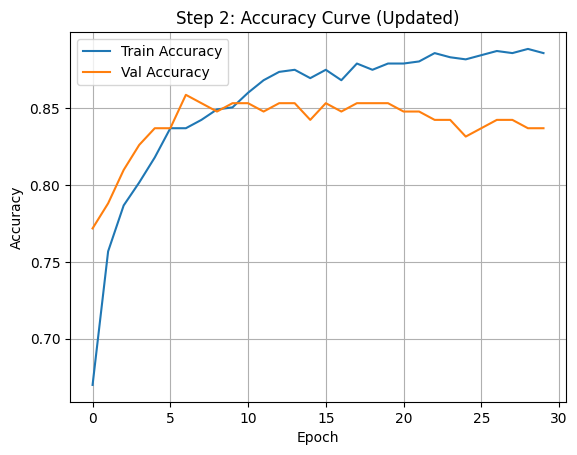

In [21]:
# Step 2: Train vs Validation Accuracy (Original Model)
import matplotlib.pyplot as plt

plt.plot(history_orig.history["accuracy"], label="Train Accuracy")
plt.plot(history_orig.history["val_accuracy"], label="Val Accuracy")
plt.title("Step 2: Accuracy Curve (Updated)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## SHAP Lime

In [22]:
!pip install shap


In [23]:
!pip install lime

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
313/313 ━━

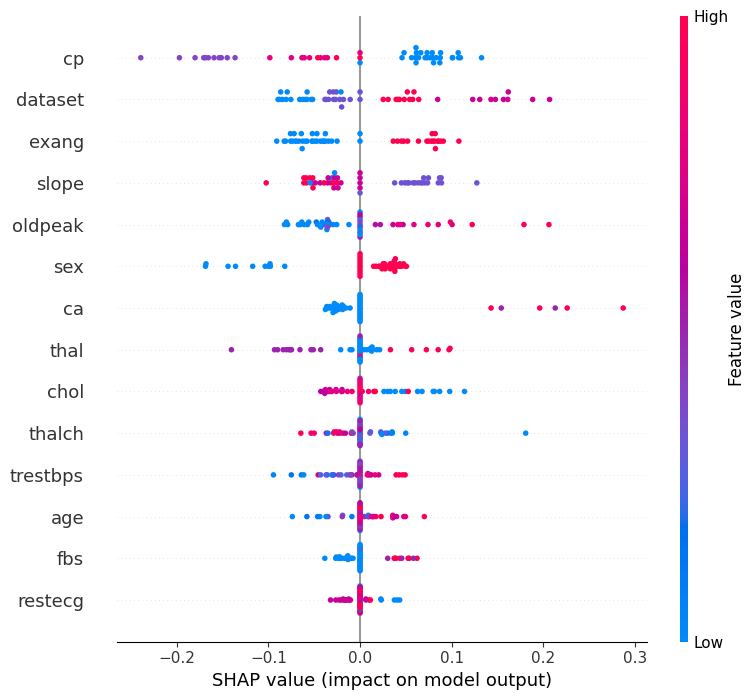

In [24]:
import shap
import numpy as np

# Flat input → model input dict
def model_predict_fn(X_flat):
    # Extract categorical and numeric split indices
    cat_len = len(categorical_cols)
    num_len = len(numerical_cols)

    # Split the flat array back into dict of model inputs
    input_dict = {}

    for i, col in enumerate(categorical_cols):
        input_dict[col] = X_flat[:, i].reshape(-1, 1).astype("int32")  # categorical: int32

    input_dict["numeric"] = X_flat[:, cat_len:].astype("float32")  # numeric: float32
    return model_reg.predict(input_dict).ravel()  # return flat output

# Flatten the categorical and numerical inputs into a single matrix
X_train_flat = np.hstack([
    X_train[categorical_cols].values,
    X_train[numerical_cols].values
])
X_test_flat = np.hstack([
    X_test[categorical_cols].values,
    X_test[numerical_cols].values
])

# Use only subset for speed
X_train_sample = X_train_flat[:100]
X_test_sample = X_test_flat[:50]

# SHAP feature names
feature_names = list(categorical_cols) + numerical_cols

# KernelExplainer setup
explainer = shap.KernelExplainer(model_predict_fn, X_train_sample)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sample, nsamples=100)

# Summary Plot
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names)


In [26]:
# LIME explainer setup
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=["No Disease", "Disease"],
    mode="classification"
)

# Predict wrapper
def lime_predict_fn(data):
    input_dict = prep_input(pd.DataFrame(data, columns=X.columns))
    return np.concatenate(
        [1 - model_reg.predict(input_dict), model_reg.predict(input_dict)],
        axis=1
    )

# Explain one instance
idx = 10  # index from the sampled test set
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[idx].values,
    predict_fn=lime_predict_fn,
    num_features=10
)

# Visualize explanation
lime_exp.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


**OVERFITTING ANALYSIS LIGHT GBM**

In [27]:
# STEP 1: IMPORTS AND DATA PREP
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import shap

# Load data
df = pd.read_csv("heart_disease_uci.csv")
df.drop(columns=["id"], inplace=True)
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=["num"], inplace=True)

# Fill missing values
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Encode categorical columns
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].astype(str)
cat_feature_indices = []

for i, col in enumerate(df.columns):
    if col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        cat_feature_indices.append(i)

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [28]:
# STEP 1: IMPORTS AND DATA PREP
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# import shap # Shap not used in this cell, can be commented out if not needed elsewhere for this model

# Load data
df = pd.read_csv("heart_disease_uci.csv")
df.drop(columns=["id"], inplace=True)
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=["num"], inplace=True)

# Fill missing values
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Encode categorical columns
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].astype(str)
cat_feature_indices = []

for i, col in enumerate(df.columns):
    if col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        # Find the index of the column in the DataFrame *after* dropping 'id' and 'num'
        # This is more robust than using the loop index 'i' directly,
        # especially if columns were dropped or reordered.
        if col in X_train.columns: # Use X_train columns after split for indexing
             cat_feature_indices.append(X_train.columns.get_loc(col))


X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Re-calculate cat_feature_indices based on the columns in X_train
# This is safer as the original df had 'id' and 'num' before dropping.
cat_feature_indices = [X_train.columns.get_loc(col) for col in cat_cols if col in X_train.columns]

# STEP 2: TRAIN ORIGINAL MODEL (May Overfit)
train_set = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_feature_indices)
test_set = lgb.Dataset(X_test, label=y_test, categorical_feature=cat_feature_indices, reference=train_set)

params_orig = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "verbosity": -1,
}

evals_result_orig = {}

# Use lgb.early_stopping callback instead of early_stopping_rounds as a direct argument
# verbose=False is often preferred in notebooks to avoid epoch-by-epoch output
early_stopping_callback = lgb.early_stopping(stopping_rounds=10, verbose=False)

evals_result_orig = {}

model_orig = lgb.train(
    params_orig,
    train_set,
    valid_sets=[train_set, test_set],
    valid_names=["train", "valid"],
    num_boost_round=100,
    callbacks=[
        lgb.early_stopping(stopping_rounds=10),
        lgb.record_evaluation(evals_result_orig)
    ]
)

y_pred_orig = model_orig.predict(X_test)
y_pred_class_orig = (y_pred_orig > 0.5).astype(int)
orig_acc = accuracy_score(y_test, y_pred_class_orig)
orig_auc = roc_auc_score(y_test, y_pred_orig)

print(f"Original Model Accuracy: {orig_acc:.4f}")
print(f"Original Model AUC: {orig_auc:.4f}")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	train's auc: 0.944721	valid's auc: 0.923362
Original Model Accuracy: 0.8424
Original Model AUC: 0.9234


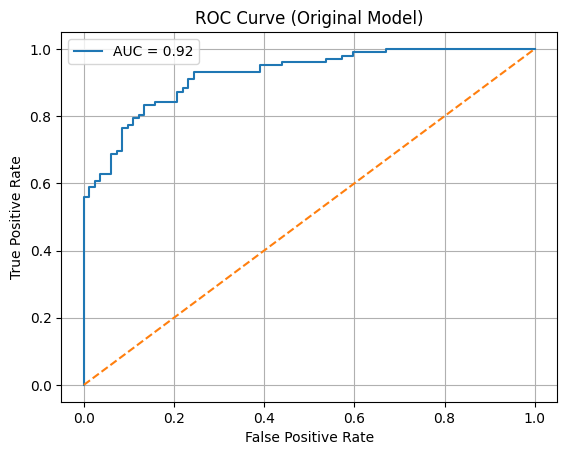

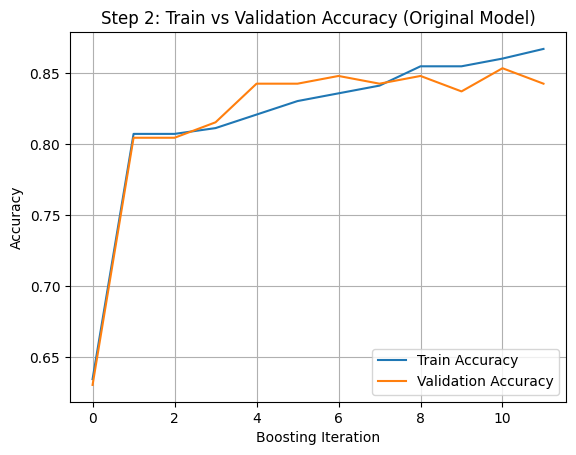

In [29]:
# STEP 3: AUC-ROC AND TRAIN/VALIDATION CURVES
fpr, tpr, _ = roc_curve(y_test, y_pred_orig)
plt.plot(fpr, tpr, label=f"AUC = {orig_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve (Original Model)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Generate predictions per iteration for accuracy tracking
train_preds_orig = [model_orig.predict(X_train, num_iteration=i) for i in range(1, model_orig.best_iteration + 1)]
test_preds_orig = [model_orig.predict(X_test, num_iteration=i) for i in range(1, model_orig.best_iteration + 1)]

# Convert to binary predictions
train_acc_orig = [accuracy_score(y_train, (pred > 0.5).astype(int)) for pred in train_preds_orig]
test_acc_orig = [accuracy_score(y_test, (pred > 0.5).astype(int)) for pred in test_preds_orig]

# Plot
plt.plot(train_acc_orig, label="Train Accuracy")
plt.plot(test_acc_orig, label="Validation Accuracy")
plt.title("Step 2: Train vs Validation Accuracy (Original Model)")
plt.xlabel("Boosting Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## SHAP and Lime

SHAP type: <class 'numpy.ndarray'>
SHAP shape: (184, 14)


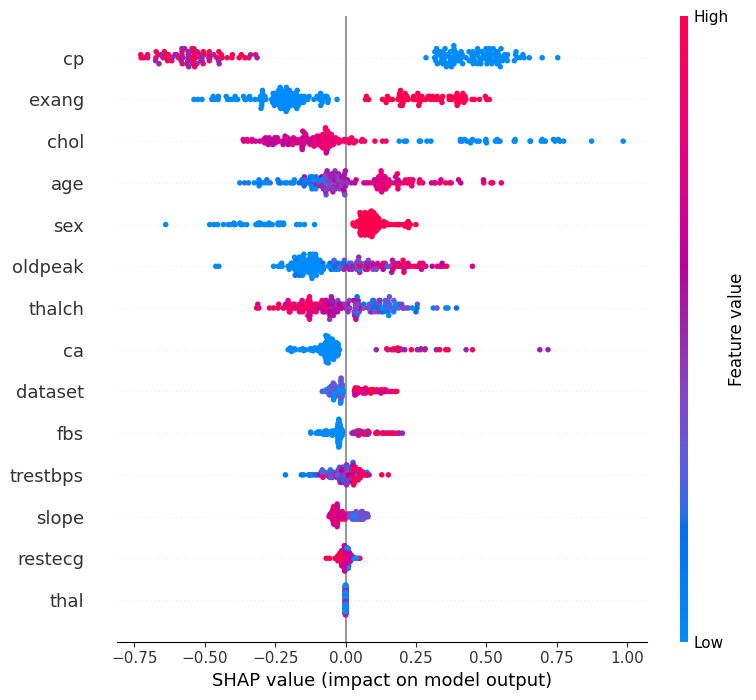

In [30]:
import shap

# TreeExplainer works with LightGBM
explainer = shap.TreeExplainer(model_orig)
shap_values = explainer.shap_values(X_test)

# Inspect what type of output we got
print("SHAP type:", type(shap_values))
if isinstance(shap_values, list):
    print("SHAP[0] shape:", np.array(shap_values[0]).shape)
else:
    print("SHAP shape:", np.array(shap_values).shape)

# Robust handling for binary classification (LightGBM)
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_to_plot = shap_values[1]  # class 1
else:
    shap_to_plot = shap_values  # fallback

# Summary plot
shap.summary_plot(shap_to_plot, X_test, feature_names=X_test.columns)


In [31]:
import lime
import lime.lime_tabular
import numpy as np

# Setup LIME Explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=["No Disease", "Disease"],
    mode="classification"
)

# Define prediction function
def lime_predict_fn(data):
    return np.column_stack([
        1 - model_orig.predict(data),
        model_orig.predict(data)
    ])

# Explain a specific test sample
idx = 7  # change index to inspect different test cases
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[idx].values,
    predict_fn=lime_predict_fn,
    num_features=10
)

# Show explanation
lime_exp.show_in_notebook(show_table=True)
